# Dimensionality Reduction: Principal Component Analysis in-depth

||continuous|categorical|
|---|---|---|
|supervised|regression|classification|
|**unsupervised**|**dimension reduction**|clustering|

Here we'll explore **Principal Component Analysis**, - which is an extremely useful linear **dimensionality reduction** technique.

Principal Component Analysis finds the principal components of data.

So what are principal components then? 

- They’re the underlying structure in the data. 

- They are the directions where there is the most variance, the directions where the data is most spread out.

This is easiest to explain by way of example. Here’s some triangles in the shape of an oval:

<img src="images/pca3.jpg">

Imagine that the triangles are points of data. 
- To find the direction where there is most variance, ***find the straight line where the data is most spread out when projected onto it.*** 
    - A vertical straight line with the points projected on to it will look like this:

<img src="images/pca9.jpg">

- The data isn’t very spread out here, therefore it doesn’t have a large variance. 

    - It is probably not the principal component.

<br></br><br></br>
- A horizontal line are with lines projected on will look like this:

<img src="images/pca8.jpg">


On this line the data is way more spread out, 
- **it has a large variance**. 
<br></br><br></br>
- In fact there isn’t a straight line you can draw that has a larger variance than a horizontal one. 
<br></br><br></br>
- ***A horizontal line is therefore the principal component in this example.***

### Eigenvectors and Eigenvalues

When we get a set of data points, like the triangles above, we can deconstruct the set into eigenvectors and eigenvalues. 

- Eigenvectors and values exist in pairs: **every eigenvector has a corresponding eigenvalue.** 
<br></br><br></br>
- An eigenvector is a **direction**.
    - in the example above the eigenvector was the direction of the line 
        - vertical, horizontal, 45 degrees etc. 
<br></br><br></br>
- An eigenvalue is a **number**
    - telling you how much variance there is in the data in that direction
        - in the example above the eigenvalue is a number telling us how spread out the data is on the line. 
<br></br><br></br>
- ***The eigenvector with the highest eigenvalue is therefore the principal component.*** 
    - In fact, the amount of eigenvectors/values that exist equals the number of **dimensions** the data set has.

For example, if we are measuring age and hours on the internet, then there are 2 variables, it’s a 2 dimensional data set, therefore there are 2 eigenvectors/values. 
- If we measure age, hours on internet and hours on mobile phone there’s 3 variables, 3-D data set, so 3 eigenvectors/values. 
<br></br><br></br>
- The reason for this is that eigenvectors put the data into a new set of dimensions, and these new dimensions have to be equal to the original amount of dimensions. 
<br></br><br></br>
This sounds complicated, but again an example should make it clear.

Here’s a graph with the oval:

<img src="images/pca2.jpg">


At the moment the oval is on an x-y axis. 
<br></br><br></br>
- x could be age and y hours on the internet. 
<br></br><br></br>
- These are the two dimensions that my data set is currently being measured in. 

Now remember that the principal component of the oval was a line splitting it longways:

<img src="images/pca10.jpg">

It turns out the other eigenvector (remember there are only two of them as it’s a 2-D problem) is **perpendicular to the principal component**. 

As we said, the eigenvectors have to be able to span the whole x-y area, in order to do this (most effectively), the two directions need to be orthogonal (i.e. 90 degrees) to one another. 
- This why the x and y axis are orthogonal to each other in the first place. 

It would be really awkward if the y axis was at 45 degrees to the x axis. So the second eigenvector would look like this:

<img src="images/pca11.jpg">

The eigenvectors have given us a much more useful axis to frame the data in. We can now re-frame the data in these new dimensions. It would look like this:

<img src="images/pca1.jpg">


PCA can be used to **reduce the dimensions of a data set**- 

- Dimension reduction is analogous to being philosophically reductionist: It reduces the data down into it’s basic components, stripping away any unnecessary parts.

For example:
<br></br><br></br>

Let’s say you are measuring three things: 
- age, 
- hours on internet, and 
- hours on mobile.
<br></br><br></br>

- There are 3 variables so it is a 3D data set. 
    - 3 dimensions is an x,y and z graph. 
    - It measures width, depth and height (like the dimensions in the real world). 
    <br></br><br></br>
- Now imagine that the data forms into an oval like the ones above, but that this oval is on a plane. 
    - i.e. all the data points lie on a piece of paper within this 3D graph
        - having width and depth, but no height.

Like this:

<img src="images/pca12.jpg">


When we find the 3 eigenvectors/values of the data set (remember 3D probem = 3 eigenvectors), 
- 2 of the eigenvectors will have large eigenvalues, and 
- one of the eigenvectors will have an eigenvalue of zero. 
    <br></br><br></br>
- The first two eigenvectors will show the width and depth of the data, 
    - but because there is no height on the data (it is on a piece of paper) the third eigenvalue will be zero.

- On the picture below 
    - ev1 is the first eignevector 
        - the one with the biggest eigenvalue, the principal component, 
    - ev2 is the second eigenvector 
        - which has a non-zero eigenvalue  
    - ev3 is the third eigenvector
        - which has an eigenvalue of zero.
<img src="images/pca13.jpg">

We can now rearrange our axes to be along the eigenvectors, rather than age, hours on internet and hours on mobile. 

- However we know that the ev3, the third eigenvector, is pretty useless. 
    - Therefore instead of representing the data in 3 dimensions, we can get rid of the useless direction and only represent it in 2 dimensions, like before:
    
    <img src="images/pca7.jpg">

<center>***This is dimension reduction.***</center>
<br></br><br></br>
- We have reduced the problem from a 3D to a 2D problem, getting rid of a dimension. 
<br></br><br></br>
- Reducing dimensions helps to simplify the data and makes it easier to visualise.
<br></br><br></br>
Lets move ahead with a code example. We'll start with our standard set of initial imports:

In [1]:
from __future__ import print_function, division

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# use seaborn plotting style defaults
import seaborn as sns; sns.set()

## Introducing Principal Component Analysis

Principal Component Analysis is a very powerful unsupervised method for *dimensionality reduction* in data.  It's easiest to visualize by looking at a two-dimensional dataset:

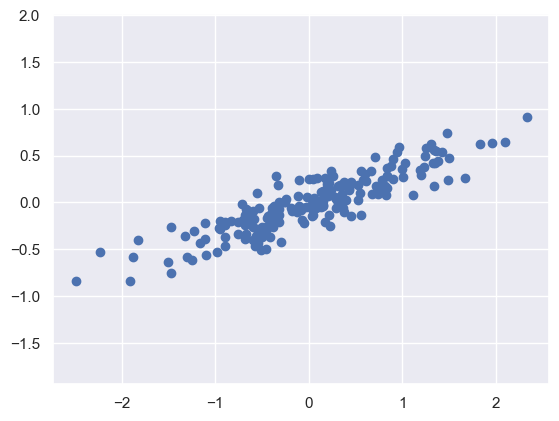

In [2]:
np.random.seed(1)
X = np.dot(np.random.random(size=(2, 2)), np.random.normal(size=(2, 200))).T
plt.plot(X[:, 0], X[:, 1], 'o')
plt.axis('equal');

We can see that there is a definite trend in the data. 

- What PCA seeks to do is to find the **Principal Axes** in the data, and explain how important those axes are in describing the data distribution.

In [3]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)
print(pca.explained_variance_)
print(pca.components_)

[0.7625315 0.0184779]
[[-0.94446029 -0.32862557]
 [-0.32862557  0.94446029]]


To see what these numbers mean, let's view them as vectors plotted on top of the data:

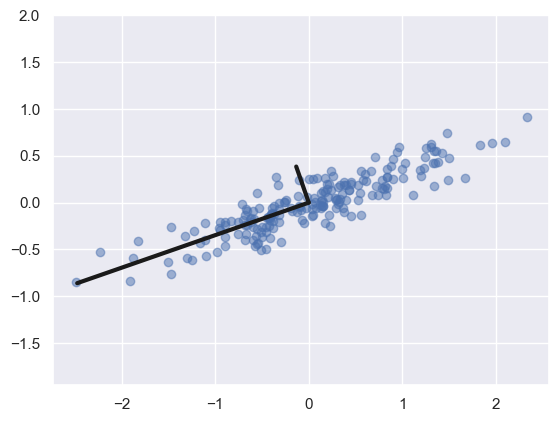

In [4]:
plt.plot(X[:, 0], X[:, 1], 'o', alpha=0.5)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    plt.plot([0, v[0]], [0, v[1]], '-k', lw=3)
plt.axis('equal');

Notice that one vector is longer than the other. 


- In a sense, this tells us that that direction in the data is somehow more "important" than the other direction.
    - The explained variance quantifies this measure of "importance" in direction.

Another way to think of it is that the second principal component could be **completely ignored** without much loss of information! 


Let's see what our data look like if we only keep 95% of the variance:

In [5]:
clf = PCA(0.95) # keep 95% of variance
X_trans = clf.fit_transform(X)
print(X.shape)
print(X_trans.shape)

(200, 2)
(200, 1)


By specifying that we want to ***throw away 5% of the variance, the data is now compressed by a factor of 50%!*** 


Let's see what the data look like after this compression:

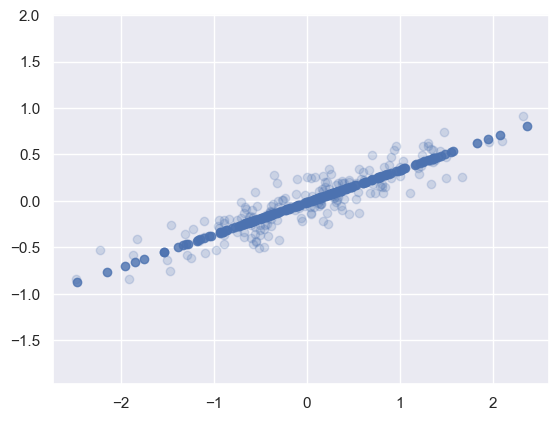

In [6]:
X_new = clf.inverse_transform(X_trans)
plt.plot(X[:, 0], X[:, 1], 'o', alpha=0.2)
plt.plot(X_new[:, 0], X_new[:, 1], 'ob', alpha=0.8)
plt.axis('equal');

The light points are the original data, while the dark points are the projected version.  


We see that after truncating 5% of the variance of this dataset and then reprojecting it, 
- the "most important" features of the data are maintained, and 
- we've compressed the data by 50%!



This is the sense in which "dimensionality reduction" works: ***if you can approximate a data set in a lower dimension, you can often have an easier time visualizing it or fitting complicated models to the data.***

### Application of PCA to Digits

The dimensionality reduction might seem a bit abstract in two dimensions, but the projection and dimensionality reduction can be extremely useful when visualizing high-dimensional data.  Let's take a quick look at the application of PCA to the digits data we looked at before:

In [7]:
from sklearn.datasets import load_digits
digits = load_digits()
X = digits.data
y = digits.target

In [8]:
pca = PCA(2)  # project from 64 to 2 dimensions
Xproj = pca.fit_transform(X)
print(X.shape)
print(Xproj.shape)

(1797, 64)
(1797, 2)


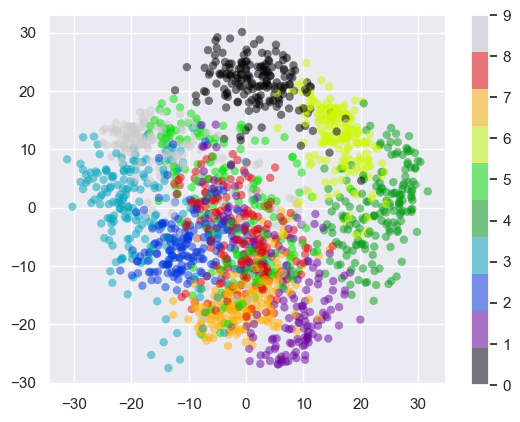

In [9]:
plt.scatter(Xproj[:, 0], Xproj[:, 1], c=y, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.colorbar();

This gives us an idea of the relationship between the digits. Essentially, we have found the optimal stretch and rotation in 64-dimensional space that allows us to see the layout of the digits, **without reference** to the labels.

### What do the Components Mean?

PCA is a very useful dimensionality reduction algorithm, because it has a very intuitive interpretation via *eigenvectors*.


The input data is represented as a ***vector***: in the case of the digits, our data is

$$
x = [x_1, x_2, x_3 \cdots]
$$

but what this really means is

$$
image(x) = x_1 \cdot{\rm (pixel~1)} + x_2 \cdot{\rm (pixel~2)} + x_3 \cdot{\rm (pixel~3)} \cdots
$$

If we reduce the dimensionality in the pixel space to (say) 6, we recover only a partial image:

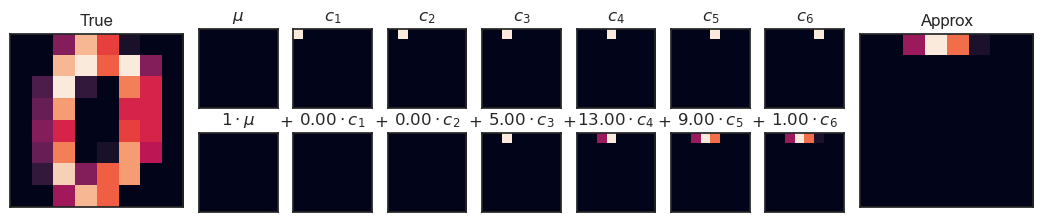

In [11]:
from fig_code.figures import plot_image_components

sns.set_style('white')
plot_image_components(digits.data[0])

But the pixel-wise representation is not the only choice. We can also use other *basis functions*, and write something like

$$
image(x) = {\rm mean} + x_1 \cdot{\rm (basis~1)} + x_2 \cdot{\rm (basis~2)} + x_3 \cdot{\rm (basis~3)} \cdots
$$

What PCA does is to choose optimal **basis functions** so that only a few are needed to get a reasonable approximation.
The low-dimensional representation of our data is the coefficients of this series, and the approximate reconstruction is the result of the sum:

In [12]:
from fig_code.figures import plot_pca_interactive
plot_pca_interactive(digits.data)

/Users/tutu/opt/anaconda3/lib/python3.9/site-packages/IPython/html.py:12: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  warn("The `IPython.html` package has been deprecated since IPython 4.0. "


interactive(children=(IntSlider(value=0, description='i', max=1796), Output()), _dom_classes=('widget-interact…

Here we see that with only six PCA components, we recover a reasonable approximation of the input!

Thus we see that PCA can be viewed from two angles. It can be viewed as **dimensionality reduction**, or it can be viewed as a form of **lossy data compression** where the loss favors noise. In this way, PCA can be used as a **filtering** process as well.

### Choosing the Number of Components

But how much information have we thrown away?  We can figure this out by looking at the **explained variance** as a function of the components:

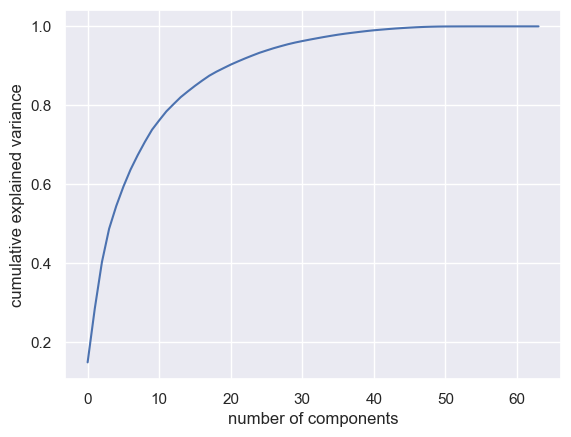

In [13]:
sns.set()
pca = PCA().fit(X)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

Here we see that our two-dimensional projection loses a lot of information (as measured by the explained variance) and that we'd need about 20 components to retain 90% of the variance.  



Looking at this plot for a high-dimensional dataset can help you understand the level of redundancy present in multiple observations.

### PCA as data compression

As we mentioned, PCA can be used for is a sort of data compression. 

- Using a small ``n_components`` allows you to represent a high dimensional point as a sum of just a few principal vectors.

Here's what a single digit looks like as you change the number of components:

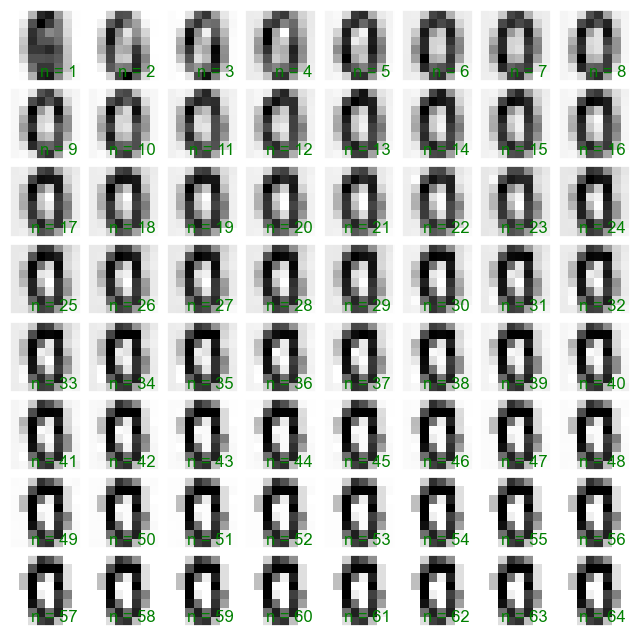

In [14]:
fig, axes = plt.subplots(8, 8, figsize=(8, 8))
fig.subplots_adjust(hspace=0.1, wspace=0.1)

for i, ax in enumerate(axes.flat):
    pca = PCA(i + 1).fit(X)
    im = pca.inverse_transform(pca.transform(X[20:21]))

    ax.imshow(im.reshape((8, 8)), cmap='binary')
    ax.text(0.95, 0.05, 'n = {0}'.format(i + 1), ha='right',
            transform=ax.transAxes, color='green')
    ax.set_xticks([])
    ax.set_yticks([])

Let's take another look at this by using IPython's ``interact`` functionality to view the reconstruction of several images at once:

In [15]:
from IPython.html.widgets import interact

def plot_digits(n_components):
    fig = plt.figure(figsize=(8, 8))
    plt.subplot(1, 1, 1, frameon=False, xticks=[], yticks=[])
    nside = 10
    
    pca = PCA(n_components).fit(X)
    Xproj = pca.inverse_transform(pca.transform(X[:nside ** 2]))
    Xproj = np.reshape(Xproj, (nside, nside, 8, 8))
    total_var = pca.explained_variance_ratio_.sum()
    
    im = np.vstack([np.hstack([Xproj[i, j] for j in range(nside)])
                    for i in range(nside)])
    plt.imshow(im)
    plt.grid(False)
    plt.title("n = {0}, variance = {1:.2f}".format(n_components, total_var),
                 size=18)
    plt.clim(0, 16)
    
interact(plot_digits, n_components=[1, 64], nside=[1, 8]);

interactive(children=(Dropdown(description='n_components', options=(1, 64), value=1), Output()), _dom_classes=…

## Other Dimensionality Reducting Routines

Note that scikit-learn contains many other unsupervised dimensionality reduction routines: some you might wish to try are
Other dimensionality reduction techniques which are useful to know about:

- [sklearn.decomposition.PCA](http://scikit-learn.org/0.13/modules/generated/sklearn.decomposition.PCA.html): 
   Principal Component Analysis
- [sklearn.decomposition.RandomizedPCA](http://scikit-learn.org/0.13/modules/generated/sklearn.decomposition.RandomizedPCA.html):
   extremely fast approximate PCA implementation based on a randomized algorithm
- [sklearn.decomposition.SparsePCA](http://scikit-learn.org/0.13/modules/generated/sklearn.decomposition.SparsePCA.html):
   PCA variant including L1 penalty for sparsity
- [sklearn.decomposition.FastICA](http://scikit-learn.org/0.13/modules/generated/sklearn.decomposition.FastICA.html):
   Independent Component Analysis
- [sklearn.decomposition.NMF](http://scikit-learn.org/0.13/modules/generated/sklearn.decomposition.NMF.html):
   non-negative matrix factorization
- [sklearn.manifold.LocallyLinearEmbedding](http://scikit-learn.org/0.13/modules/generated/sklearn.manifold.LocallyLinearEmbedding.html):
   nonlinear manifold learning technique based on local neighborhood geometry
- [sklearn.manifold.IsoMap](http://scikit-learn.org/0.13/modules/generated/sklearn.manifold.Isomap.html):
   nonlinear manifold learning technique based on a sparse graph algorithm
   
Each of these has its own strengths & weaknesses, and areas of application. You can read about them on the [scikit-learn website](http://sklearn.org).

<small><i>Reference [GitHub](https://github.com/jakevdp/sklearn_pycon2015/).</i></small>